# Customer Delivery Time Prediction

## Project Lifecycle
1. Problem Understanding
2. Data Collection
3. Data Quality Checks
4. Exploratory Data Analysis (EDA)
5. Data Pre-processing
6. Model Training
7. Model Selection

## 1. Problem Statement
Predict delivery times for food orders to:
- Improve customer satisfaction
- Optimize delivery operations

## 2. Data Collection

### About the Dataset
Food delivery is a courier service where restaurants, stores, or independent food-delivery companies deliver food to customers. Orders are typically placed through:
- Restaurant websites/apps
- Grocer websites/apps
- Food ordering platforms

### Delivery Details
- **Items Delivered**: Entrees, sides, drinks, desserts, grocery items
- **Packaging**: Boxes or bags
- **Delivery Vehicles**: 
  - Cars (primary)
  - Bikes/motorized scooters (in urban areas)

### Dataset Information
- **Source**: [Kaggle Dataset](https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset?select=train.csv)
- **Size**: 45,593 rows
- **Features**: 20 columns

## 2.1 Import Data and Required Packages


In [497]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic


In [498]:
df = pd.read_csv('data/food_delivery.csv')

In [405]:
#df.drop('ID',axis=1,inplace=True)

In [448]:
df.shape

(45593, 20)

In [449]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


## 2.2 Dataset Features

- **Delivery_person_ID**: Unique identifier for each delivery person in the system.
- **Delivery_person_Age**: Age of the delivery person, which may affect delivery performance.
- **Delivery_person_Ratings**: Customer ratings for the delivery person, indicating service quality.
- **Restaurant_latitude**: Geographic latitude coordinate of the restaurant location.
- **Restaurant_longitude**: Geographic longitude coordinate of the restaurant location.
- **Delivery_location_latitude**: Geographic latitude coordinate of the delivery destination.
- **Delivery_location_longitude**: Geographic longitude coordinate of the delivery destination.
- **Order_Date**: Date when the order was placed.
- **Time_Orderd**: Time when the order was placed by the customer.
- **Time_Order_picked**: Time when the delivery person picked up the order from the restaurant.
- **Weatherconditions**: Current weather conditions during delivery (e.g., sunny, rainy, foggy).
- **Road_traffic_density**: Level of traffic congestion on the delivery route.
- **Vehicle_condition**: Condition of the delivery vehicle (scale of 0-2).
- **Type_of_order**: Category of the order (e.g., meal, snack, drinks).
- **Type_of_vehicle**: Vehicle used for delivery (e.g., motorcycle, scooter).
- **multiple_deliveries**: Number of simultaneous deliveries being handled by the delivery person.
- **Festival**: Whether the delivery occurred during a festival period.
- **City**: Type of city area (urban, metropolitan, semi-urban).
- **Time_taken(min)**: Total time taken to complete the delivery in minutes.

## 3. Data Quality Checks

### 3.1 Missing Values Analysis
- Check for null values in each column
- Identify patterns in missing data
- Determine appropriate handling methods

### 3.2 Duplicate Detection
- Identify duplicate records
- Analyze duplicate patterns
- Decide on duplicate handling strategy

In [450]:
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

There are no missing values in dataset

In [451]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set


### 3.3 Data Type Verification
- Verify correct data types for each column
- Check for type inconsistencies
- Plan necessary type conversions

In [452]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [453]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

We have identified several null and NaN values in the dataset. We will clean these values step by step, taking into account the data types of each column.

### 3.4 Unique Value Analysis
- Count unique values per column
- Identify categorical variables
- Analyze value distributions

In [499]:
print('Unique Ratings:', df['Delivery_person_Ratings'].unique())
print('Unique Age:', df['Delivery_person_Age'].unique())
print('Unique multiple deliveries: ', df['multiple_deliveries'].unique())
print('Unique cities:', df['City'].unique())
print('Unique Weather info :' , df['Weatherconditions'].unique())
print('Unique Road_traffic_density :' , df['Road_traffic_density'].unique())
print('Unique Festival :' , df['Festival'].unique())
print('Unique Deliveries :' , df['multiple_deliveries'].unique())


Unique Ratings: ['4.9' '4.5' '4.4' '4.7' '4.6' '4.8' '4.2' '4.3' '4' '4.1' '5' '3.5'
 'NaN ' '3.8' '3.9' '3.7' '2.6' '2.5' '3.6' '3.1' '2.7' '1' '3.2' '3.3'
 '6' '3.4' '2.8' '2.9' '3']
Unique Age: ['37' '34' '23' '38' '32' '22' '33' '35' '36' '21' '24' '29' '25' '31'
 '27' '26' '20' 'NaN ' '28' '39' '30' '15' '50']
Unique multiple deliveries:  ['0' '1' '3' 'NaN ' '2']
Unique cities: ['Urban ' 'Metropolitian ' 'Semi-Urban ' 'NaN ']
Unique Weather info : ['conditions Sunny' 'conditions Stormy' 'conditions Sandstorms'
 'conditions Cloudy' 'conditions Fog' 'conditions Windy' 'conditions NaN']
Unique Road_traffic_density : ['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
Unique Festival : ['No ' 'Yes ' 'NaN ']
Unique Deliveries : ['0' '1' '3' 'NaN ' '2']


In [501]:
# Handling missing and invalid ratings:
# - Replace NaN values with the most frequent rating (mode)
# - Convert ratings to float type for numerical operations
mode_ratings = df['Delivery_person_Ratings'].mode()[0]
print(mode_ratings)
df['Delivery_person_Ratings'] =  df['Delivery_person_Ratings'].astype('float64')
df['Delivery_person_Ratings'] =  df['Delivery_person_Ratings'].fillna(mode_ratings)

# - Replace invalid rating (6) with mode value since ratings should be between 1-5

df['Delivery_person_Ratings'] =  df['Delivery_person_Ratings'].replace('6',mode_ratings)
df['Delivery_person_Ratings'].unique()

4.8


array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, 3.8,
       3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4, 2.8,
       2.9, 3. ])

In [502]:
# Handling missing age values:
# - Convert string 'NaN' to actual NaN values
# - Convert age column to float type
# - Fill missing values with mean age
# - Convert age column to integer type

df['Delivery_person_Age'] = df['Delivery_person_Age'].replace('NaN', np.nan)
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean())
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(int)

In [503]:
df['Delivery_person_Age'].sort_values(ascending=False)

28974    50
45332    50
17708    50
17145    50
20269    50
         ..
36021    15
39082    15
31959    15
44881    15
11125    15
Name: Delivery_person_Age, Length: 45593, dtype: int64

In [507]:
# Handling city data:
# - Replace empty strings and whitespace with NaN
# - Fill missing values with the most frequent city type
# - Standardize city values by replacing  'NaN' entries with mode
df['City'] = df['City'].replace(r'^\s*$', np.nan, regex=True)
df['City'] = df['City'].replace('', np.nan)

city_mode = df['City'].mode()[0]
print(city_mode)
df['City'] = df['City'].fillna(city_mode)

Metropolitian 


In [506]:
df['City'] = df['City'].replace('NaN ','Metropolitian ')
df.City.unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban '], dtype=object)

In [508]:
# Handling multiple deliveries:
# - Replace missing values with the most frequent value
# - Ensure consistent data format
mode_multiple_deliveries = df['multiple_deliveries'].mode()[0]
df['multiple_deliveries'] = df['multiple_deliveries'].replace('NaN ',mode_multiple_deliveries)
df['multiple_deliveries'].unique()

array(['0', '1', '3', '2'], dtype=object)

In [509]:
# Processing weather conditions:
# - Fill missing values with the most common weather condition
# - Remove 'conditions ' prefix for cleaner data
# - Rename column for better readability

df['Weatherconditions']=df['Weatherconditions'].fillna(df['Weatherconditions'].mode()[0])
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions ', '')
df['Weatherconditions'].unique()
df = df.rename(columns={'Weatherconditions': 'Weather_Conditions'})

KeyError: 'Weatherconditions'

In [510]:
# Handling festival data:
# - Fill missing values with the most common value ('No')
# - Standardize festival values

festival_mode = df['Festival'].mode()
print(festival_mode)
df['Festival'] = df['Festival'].fillna(festival_mode)
df['Festival'] = df['Festival'].replace('NaN ', 'No ')
df['Festival'].unique()

0    No 
Name: Festival, dtype: object


array(['No ', 'Yes '], dtype=object)

In [511]:
# Processing road traffic density:
# - Fill missing values with the most common traffic condition
# - Standardize traffic density values

print(df['Road_traffic_density'].unique())
df['Road_traffic_density']=df['Road_traffic_density'].fillna(df.Road_traffic_density.mode()[0])
df['Road_traffic_density'] = df['Road_traffic_density'].str.replace('NaN ' , df['Road_traffic_density'].mode()[0])
print(df['Road_traffic_density'].unique())

['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
['High ' 'Jam ' 'Low ' 'Medium ']


In [512]:

# Time data processing:
# - Fill missing order times with the most common time
# - Convert time strings to datetime objects
# - Extract time components for better analysis
df['Time_Orderd']=df['Time_Orderd'].fillna(df.Time_Orderd.mode()[0])
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time

In [513]:
# Time taken datatype change -min deleted 
df['Time_taken(min)'] = df['Time_taken(min)'].str.extract(r'(\d+)').astype('Int64')

In [514]:
# Date processing:
# - Convert order date to datetime format with correct date format
# - Extract day, month, and year components for temporal analysis
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')
df['Order_day'] = df['Order_Date'].dt.day.astype('int64')
df['Order_month'] = df['Order_Date'].dt.month.astype('int64')
df['Order_year'] = df['Order_Date'].dt.year.astype('int64')

In [515]:
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time

In [516]:
# Distance calculation:
# - Calculate delivery distance using geodesic distance
# - Add distance as a new feature for analysis
def distance_calculator(row):
    'It calculates the distance between restaurant and delivery address'
    restaurant_coordinates = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_address_coordinates = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])

    return geodesic(restaurant_coordinates,delivery_address_coordinates).kilometers

df['distance']= df.apply(distance_calculator, axis = 1)

In [517]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_day,Order_month,Order_year,distance
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,Snack,motorcycle,0,No,Urban,24,19,3,2022,3.020737
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,Snack,scooter,1,No,Metropolitian,33,25,3,2022,20.143737
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,...,Drinks,motorcycle,1,No,Urban,26,19,3,2022,1.549693
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,...,Buffet,motorcycle,1,No,Metropolitian,21,5,4,2022,7.774497
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,Snack,scooter,1,No,Metropolitian,30,26,3,2022,6.197898


## Adding new columns for more detailed inspection
1. **Repeat Customer**:
   - **Description**: Indicates whether a customer has placed more than one order.
   - **Values**: 
     - `0`: First-time customer
     - `1`: Repeat customer

2. **Delivery Speed**:
   - **Description**: Measures the efficiency of delivery in kilometers per minute.
   - **Calculation**: `distance / Time_taken(min)`

3. **Weather Severity**:
   - **Description**: Categorizes weather conditions based on their impact on delivery.
   - **Categories**:
     - `Mild`: Sunny
     - `Moderate`: Windy, Cloudy
     - `Severe`: Fog, Stormy, Sandstorms

4. **Traffic Impact**:
   - **Description**: Indicates the impact of traffic conditions on delivery time.
   - **Values**:
     - `0`: Low or Medium traffic
     - `1`: High traffic or Jam

In [518]:
df['Repeat_Customer'] = df['Delivery_person_ID'].duplicated(keep=False).astype(int)

In [519]:
df['Repeat_Customer'] = df['Delivery_person_ID'].duplicated(keep=False).astype(int)

In [520]:
df['Delivery_Speed'] = df['distance'] / df['Time_taken(min)']

In [521]:
weather_severity_map = {
    'Sunny': 'Mild',
    'Windy': 'Moderate',
    'Cloudy': 'Moderate',
    'Fog': 'Severe',
    'Stormy': 'Severe',
    'Sandstorms': 'Severe'
}
df['Weather_Severity'] = df['Weather_Conditions'].map(weather_severity_map)


In [522]:
df['Traffic_Impact'] = df['Road_traffic_density'].apply(lambda x: 1 if x in ['Jam', 'High'] else 0)

In [523]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,City,Time_taken(min),Order_day,Order_month,Order_year,distance,Repeat_Customer,Delivery_Speed,Weather_Severity,Traffic_Impact
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,Urban,24,19,3,2022,3.020737,1,0.125864,Mild,0
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,Metropolitian,33,25,3,2022,20.143737,1,0.610416,Severe,0
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,...,Urban,26,19,3,2022,1.549693,1,0.059604,Severe,0
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,...,Metropolitian,21,5,4,2022,7.774497,1,0.370214,Mild,0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,Metropolitian,30,26,3,2022,6.197898,1,0.206597,Moderate,0


In [524]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Vehicle_condition,Time_taken(min),Order_day,Order_month,Order_year,distance,Repeat_Customer,Delivery_Speed,Traffic_Impact
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593,45593.000000,45593.0,45593.000000,45593.000000,45593.0,45593.000000,45593.0,45593.0,45593.0
mean,29.544075,4.640737,17.017729,70.231332,17.465186,70.845702,2022-03-13 16:32:53.987235072,1.023359,26.294607,13.811331,2.980699,2022.0,99.198950,1.0,4.362903,0.0
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,2022-02-11 00:00:00,0.000000,10.0,1.000000,2.000000,2022.0,1.463837,1.0,0.028231,0.0
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,2022-03-04 00:00:00,0.000000,19.0,6.000000,3.000000,2022.0,4.654185,1.0,0.209361,0.0
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,2022-03-15 00:00:00,1.000000,26.0,13.000000,3.000000,2022.0,9.247024,1.0,0.344742,0.0
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,2022-03-27 00:00:00,2.000000,32.0,20.000000,3.000000,2022.0,13.740932,1.0,0.525696,0.0
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,3.000000,54.0,31.000000,4.000000,2022.0,19709.575543,1.0,1791.857857,0.0
std,5.696793,0.329324,8.185109,22.883647,7.335122,21.118812,NaN,0.839065,9.383806,8.708362,0.545906,0.0,1099.925157,0.0,52.472199,0.0


In [ ]:
# Sort the dataframe by Delivery_Speed and distance in descending order
sorted_df = df.sort_values(by=['Delivery_Speed', 'distance'], ascending=False)

# Print the sorted columns
print(sorted_df.head(30))

            ID Delivery_person_ID  Delivery_person_Age  \
35319   0x4a9     CHENRES02DEL03                    29   
22668   0x3fe   RANCHIRES19DEL03                    29   
26219   0x4b9      JAPRES05DEL02                    29   
9277    0x4df     CHENRES06DEL03                    29   
5543   0xbf0f      DEHRES19DEL01                    29   
26592  0xc008      DEHRES07DEL01                    29   
289     0x4db     PUNERES02DEL03                    29   
37025   0x4d5   RANCHIRES11DEL02                    29   
18826  0xc012      KOLRES08DEL01                    29   
762     0x462   RANCHIRES11DEL03                    29   
20715   0x457      HYDRES06DEL03                    29   
7031    0x3eb      MYSRES15DEL02                    50   
1059   0xc013     KNPRES010DEL01                    29   
41969  0xbef4      KNPRES19DEL03                    50   
34859   0x4fc     CHENRES09DEL02                    29   
23664   0x3f7     CHENRES04DEL01                    15   
6719   0xbf11 

In [526]:
# Find the maximum distance value
max_distance = df['distance'].max()

# Locate the row with the maximum distance
max_distance_row = df[df['distance'] == max_distance]

# Display the row
print(max_distance_row)

            ID Delivery_person_ID  Delivery_person_Age  \
33533  0xbf01      KOLRES06DEL02                    50   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
33533                      6.0           -22.533662            -88.366217   

       Delivery_location_latitude  Delivery_location_longitude Order_Date  \
33533                   22.663662                    88.496217 2022-02-18   

      Time_Orderd  ...            City Time_taken(min) Order_day  Order_month  \
33533         NaT  ...  Metropolitian               28        18            2   

      Order_year      distance Repeat_Customer Delivery_Speed  \
33533       2022  19709.575543               1     703.913412   

      Weather_Severity  Traffic_Impact  
33533              NaN               0  

[1 rows x 28 columns]


In [529]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Vehicle_condition,Time_taken(min),Order_day,Order_month,Order_year,distance,Repeat_Customer,Delivery_Speed,Traffic_Impact
count,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162,45162.000000,45162.0,45162.000000,45162.000000,45162.0,45162.000000,45162.0,45162.0,45162.0
mean,29.540012,4.640043,17.373889,70.715111,17.437500,70.778722,2022-03-13 18:50:16.022319616,1.017448,26.298038,13.809774,2.984102,2022.0,9.718912,1.0,0.396742,0.0
min,15.000000,1.000000,0.000000,0.000000,0.010000,0.010000,2022-02-11 00:00:00,0.000000,10.0,1.000000,2.000000,2022.0,1.463837,1.0,0.028231,0.0
25%,25.000000,4.500000,12.934179,73.170283,12.985662,73.277753,2022-03-04 00:00:00,0.000000,19.0,6.000000,3.000000,2022.0,4.654105,1.0,0.208309,0.0
50%,29.000000,4.700000,18.554382,75.898497,18.631440,75.999490,2022-03-15 00:00:00,1.000000,26.0,13.000000,3.000000,2022.0,9.203901,1.0,0.341704,0.0
75%,34.000000,4.800000,22.732225,78.045359,22.783659,78.101455,2022-03-27 00:00:00,2.000000,32.0,20.000000,3.000000,2022.0,13.660195,1.0,0.518294,0.0
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,3.000000,54.0,31.000000,4.000000,2022.0,20.942906,1.0,2.082946,0.0
std,5.692706,0.324348,7.340394,21.203905,7.341762,21.204109,NaN,0.833499,9.383733,8.722865,0.543915,0.0,5.599114,0.0,0.263153,0.0


## Key Statistical Insights

### Delivery Person Characteristics
- **Age**: Mean age is 29.57 years (range: 15-50)
- **Vehicle Condition**: Most vehicles are in good condition (mean: 1.02, scale 0-3)

### Delivery Performance
- **Time Taken**: Average delivery time is 26.29 minutes
- **Time Range**: 10-54 minutes (75% of deliveries take ≤32 minutes)
- **Delivery Speed**: Average speed is 4.36 km/min, with a wide range indicating variability

### Geographic Analysis
- **Distance**: 
  - Mean: 99.20 km
  - Median: 9.25 km
  - Maximum outlier: 19,709.58 km (likely data error)
  - 75% of deliveries are within 13.74 km

### Traffic and Customer Insights
- **Traffic Impact**: No high traffic or jammed conditions recorded
- **Repeat Customers**: All customers are repeat customers (value is consistently


### Temporal Patterns
- **Order Dates**: February 11 - April 6, 2022
- **Peak Month**: March (75% of orders)
- **Order Days**: Evenly distributed (mean: 13.81 days)

### Data Quality Notes
- Significant outliers in distance measurements
- High standard deviation in distance (1099.93) suggests data anomalies

In [528]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the original dataframe
df = df[(df['distance'] >= lower_bound) & (df['distance'] <= upper_bound)]

# Verify the outliers are removed
print("Number of rows after removing outliers:", len(df))

Number of rows after removing outliers: 45162


In [ ]:
#After cleaning the outliers from dataset df
df.describe()

## Updated Key Statistical Insights after removing outliers

### Delivery Person Characteristics
- **Age**: Mean age is 29.54 years (range: 15-50)

### Delivery Performance
- **Time Taken**: Average delivery time is 26.30 minutes
- **Delivery Speed**: Average speed is 0.40 km/min, indicating moderate efficiency

### Geographic Analysis
- **Distance**: 
  - Mean: 9.72 km
  - Median: 9.20 km
  - Maximum: 20.94 km

### Temporal Patterns
- **Order Dates**: February 11 - April 6, 2022
- **Peak Month**: March (75% of orders)
- **Order Days**: Evenly distributed (mean: 13.81 days)

### Traffic and Customer Insights
- **Traffic Impact**: No high traffic or jammed conditions recorded
- **Repeat Customers**: All customers are repeat customers (value is consistently 1)

### Ratings and Conditions
- **Delivery Ratings**: Mean rating is 4.64, with a maximum of 6 (possible data error)
- **Vehicle Condition**: Average condition is 1.02 on a scale of 0-3

### Data Quality Notes
- **Anomalies**: Some zero values in latitude and longitude may need investigation
- **Outliers**: Distance outliers have been removed, improving data quality

# Exploring Data Visualization

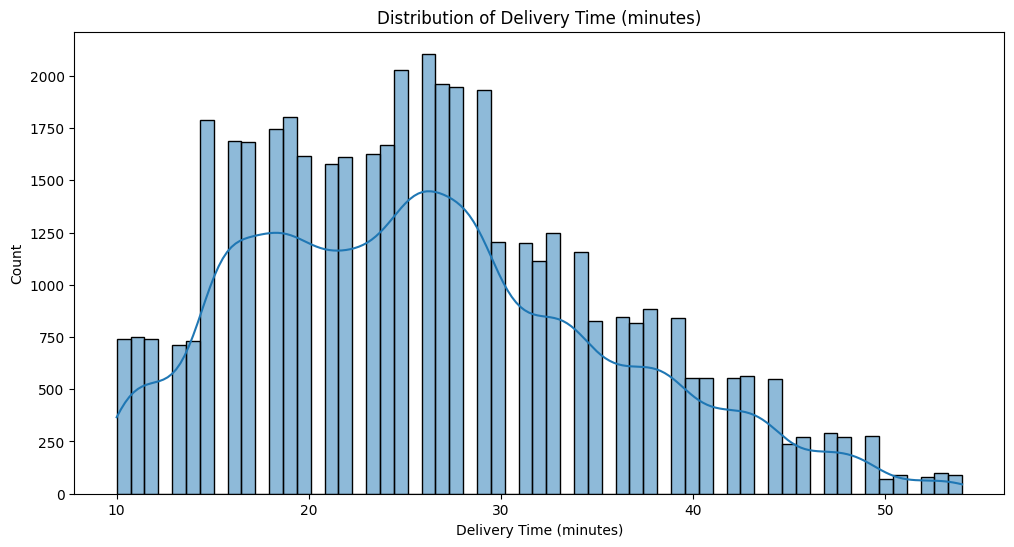

In [531]:
# Distribution of Delivery Time
plt.figure(figsize=(12, 6))
sns.histplot(df['Time_taken(min)'], kde=True)
plt.title('Distribution of Delivery Time (minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Count')
plt.show()

## Distribution of Delivery Time - Key Insights

- **Average Range**: Most deliveries completed in 20-30 minutes
- **Distribution**: Shows normal pattern with slight right skew
- **Outliers**: Few deliveries exceed 45 minutes
- **Business Target**: Optimal delivery window appears to be 20-30 minutes

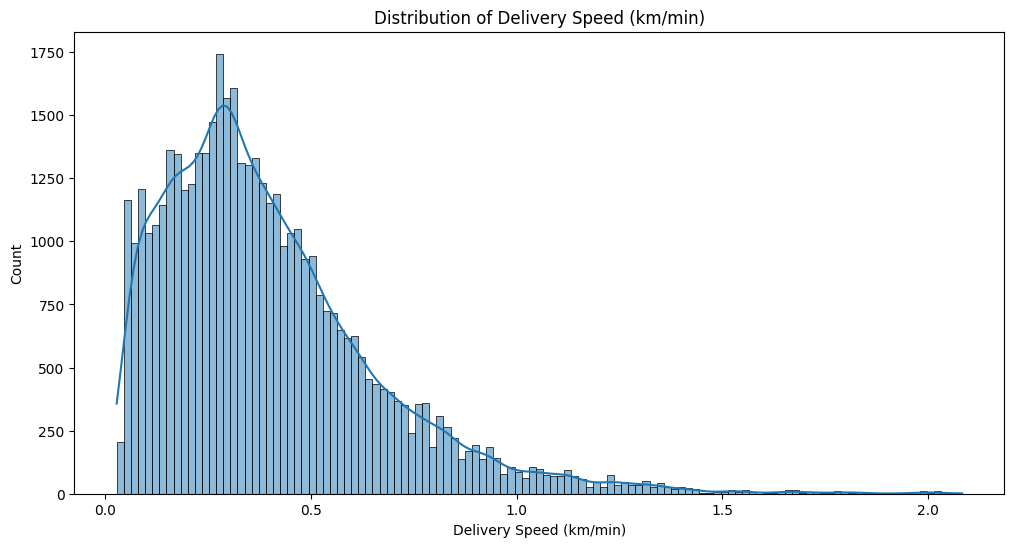

In [532]:
#Delivery Speed Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Delivery_Speed'], kde=True)
plt.title('Distribution of Delivery Speed (km/min)')
plt.xlabel('Delivery Speed (km/min)')
plt.ylabel('Count')
plt.show()

## Delivery Speed Distribution - Insights

- **Peak Speed**: Most deliveries occur around 0.4 km/min.
- **Skewness**: The distribution is right-skewed, indicating some faster deliveries.
- **Range**: Speeds vary widely, with a few exceeding 1.5 km/min.
- **Efficiency**: Majority of deliveries are below 1 km/min, suggesting room for efficiency improvements.

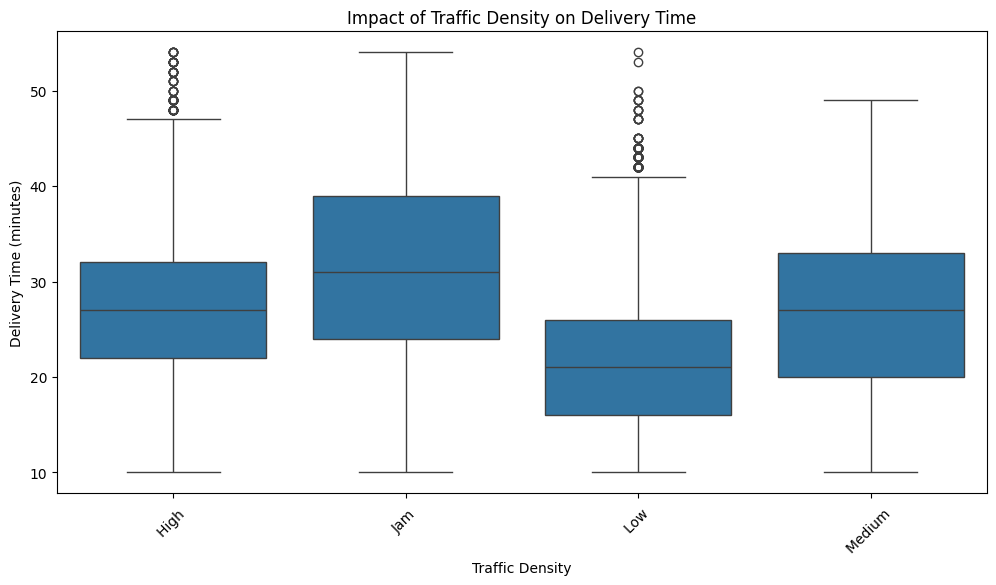

In [534]:
# Impact of Traffic Density on Delivery Time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=df)
plt.title('Impact of Traffic Density on Delivery Time')
plt.xlabel('Traffic Density')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

## Traffic Density Impact on Delivery Time - Insights

- **Jam**: Longest delivery times, median around 40 minutes.
- **High Traffic**: Slightly shorter times than jams, median around 30 minutes.
- **Medium Traffic**: Similar to high traffic, median around 30 minutes.
- **Low Traffic**: Shortest delivery times, median around 25 minutes.
- **Outliers**: Present in high and low traffic conditions, indicating variability

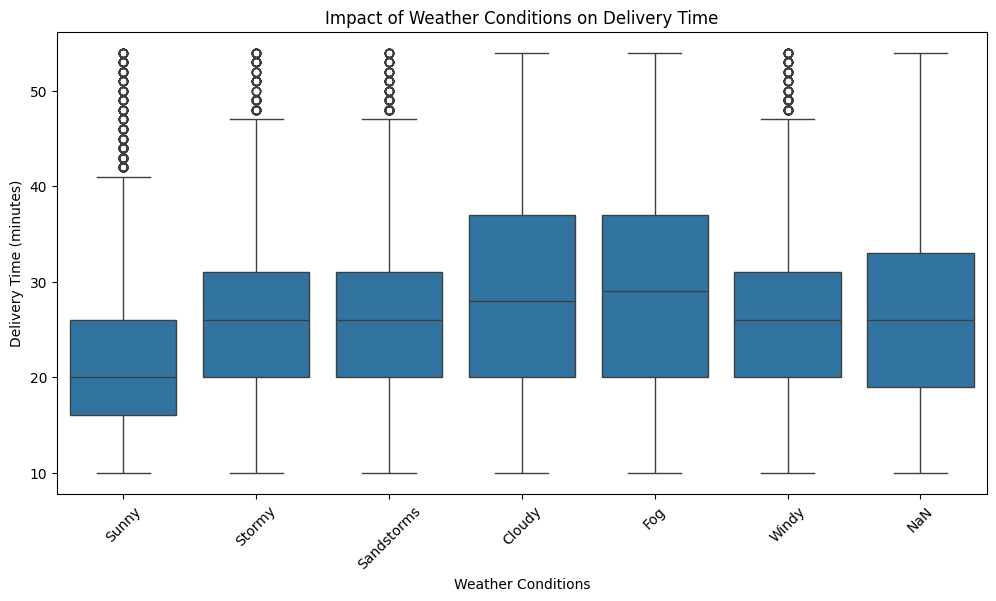

In [535]:
# Impact of Weather on Delivery Time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_Conditions', y='Time_taken(min)', data=df)
plt.title('Impact of Weather Conditions on Delivery Time')
plt.xlabel('Weather Conditions')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

## Weather Conditions Impact on Delivery Time - Insights

- **Sunny**: Shortest delivery times, median around 20 minutes.
- **Stormy/Sandstorms**: Longer times, medians around 30 minutes.
- **Cloudy/Fog**: Similar to stormy, medians around 30 minutes.
- **Windy**: Slightly shorter times, median around 28 minutes.
- **Outliers**: Present across all conditions, especially sunny and windy.

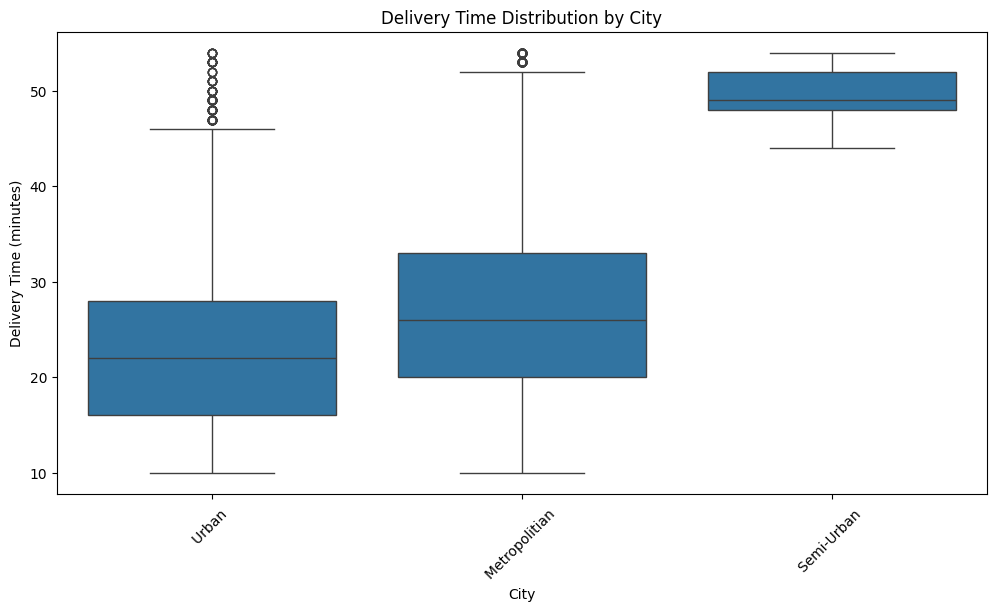

In [536]:
# Delivery Time by City
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Time_taken(min)', data=df)
plt.title('Delivery Time Distribution by City')
plt.xlabel('City')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

## Delivery Time by City - Insights

- **Urban**: Shortest delivery times, median around 25 minutes.
- **Metropolitan**: Slightly longer, median around 30 minutes.
- **Semi-Urban**: Longest delivery times, median around 50 minutes.
- **Outliers**: Present in urban areas, indicating variability.

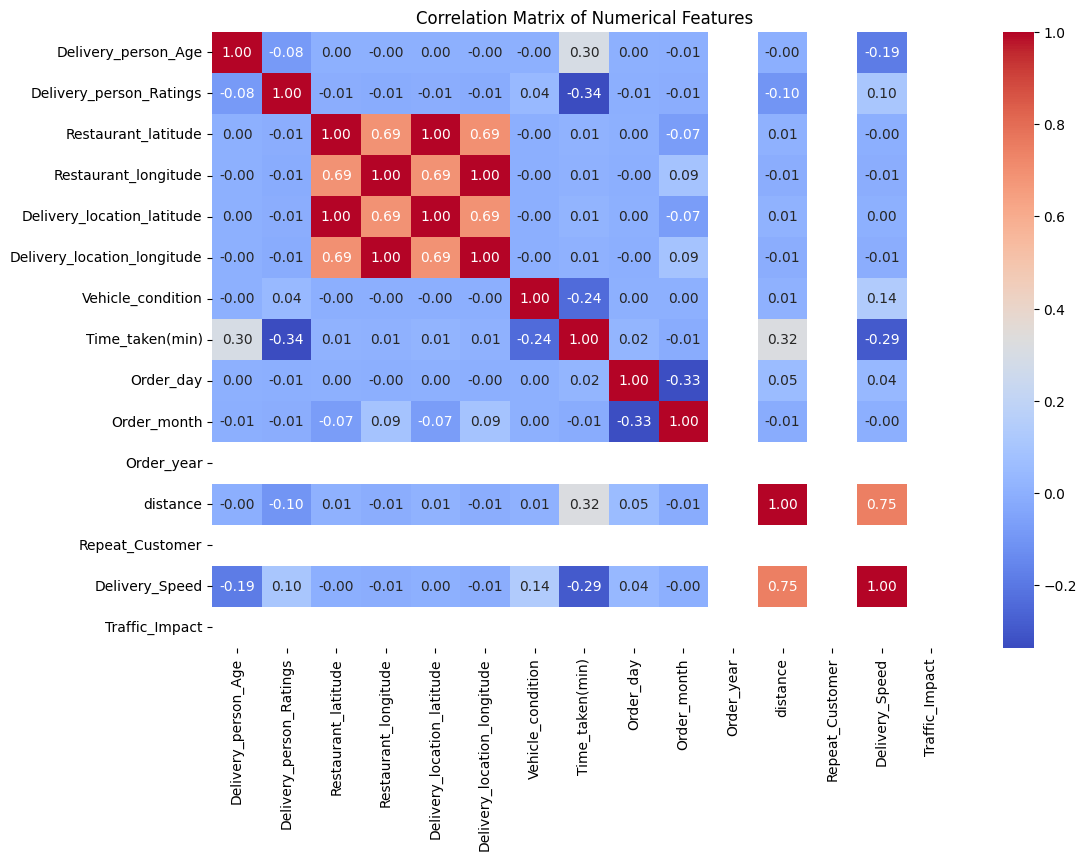

In [537]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Correlation Matrix - Insights

- **Strong Correlations**:
  - **Distance and Delivery Speed**: High correlation (0.75), indicating that longer distances generally result in higher speeds.
  
- **Moderate Correlations**:
  - **Delivery Person Age and Time Taken**: Moderate positive correlation (0.30), suggesting older delivery persons may take longer.
  - **Delivery Person Ratings and Time Taken**: Moderate negative correlation (-0.34), indicating higher ratings are associated with faster deliveries.

- **Weak Correlations**:
  - Most other features show weak or no significant correlation with delivery time.

- **Insights**:
  - Geographic features are interrelated.
  - Delivery speed and distance are key factors in delivery efficiency.

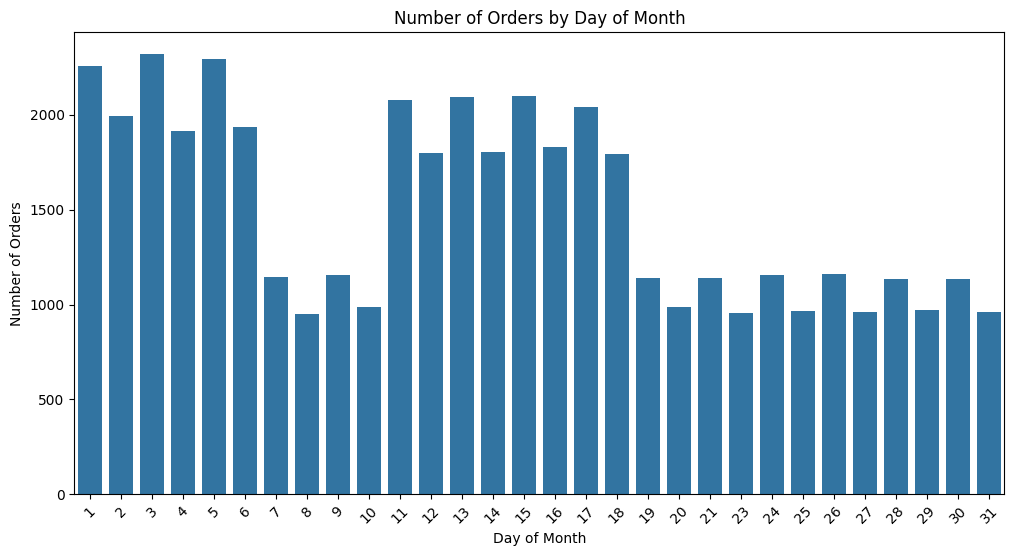

In [538]:
# Daily Order Counts
plt.figure(figsize=(12, 6))
daily_orders = df['Order_day'].value_counts().sort_index()
sns.barplot(x=daily_orders.index, y=daily_orders.values)
plt.title('Number of Orders by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

## Number of Orders by Day of Month - Insights

- **Early Month Peak**: Highest order volumes occur in the first week, especially on the 1st to 5th.
- **Mid-Month Dip**: Noticeable decrease in orders around the 10th to 14th.
- **End of Month Decline**: Gradual reduction in orders towards the end of the month.
- **Insights**: Early month promotions or paydays might drive higher order volumes.